In [1]:
from subprocess import run
from rdkit import Chem

from molclub.conf_tools import etkdg, conf_utils
from molclub.compute import orca_utils, orca_dft

In [2]:
orca_dir = '/Users/ozone/bin/_orca_5_0_3/'

# smi = 'COC1=C(F)C=CC2=C1C=C(N2)C(=O)N(C)C1=CN=C(O1)C#N'
# smi = 'CCCC'
smi = 'O'
mol = Chem.MolFromSmiles(smi)
etkdg_mols = etkdg.generate_conformers(mol, num_confs='auto', num_threads=4)
mol = etkdg_mols[0]

etkdg.generate_conformers()

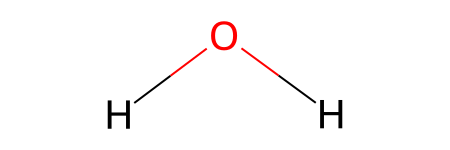

In [3]:
orca_dft.sp(mol, orca_dir, num_threads=4)
mol

In [4]:
mols, energies = orca_dft.opt_traj(mol, orca_dir, num_threads=4)
energies

[-47958.1834755369,
 -47958.90640979745,
 -47958.929570921595,
 -47958.93730659602,
 -47958.93730983643]

In [6]:
orca_dft.opt_cons(mols[-1], ['bond'], [[0, 1]], [1.5], orca_dir)

(<rdkit.Chem.rdchem.Mol at 0x12b34fec0>, -47898.017945904714)

In [ ]:
# write PES walker